# Kansas City Zoning Districts

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests

In [2]:
kc_zones_url = "https://maps.wycokck.org/gisdata/shp/zoning_py.zip"

In [3]:
kck_wards = gpd.read_file("https://maps.wycokck.org/gisdata/shp/ward_prec_py.zip")

In [4]:
armourdale_ward = '06'

In [5]:
armourdale = kck_wards[kck_wards['WARD'] == armourdale_ward]
armourdale

,VTD,VTD_S,CITY,CITY_CODE,CITY_PREF,WARD,PRECINCT,BPU,UG,KS_HOUSE,...,BPU_At_Lg1,BPU_At_Lg2,BPU_At_Lg3,DATE_MOD,DATE_ADDED,MOD_BY,ADDED_BY,Shape_Leng,Shape_Area,geometry
68,KC06-02,600310,Kansas City,1,KC,06,02,3,2,37,...,None,None,None,2023-01-09,2023-01-09,GIS_EDITOR,GIS_EDITOR,46433.543935,5.578922e+07,"POLYGON ((2257706.000 296463.281, 2258080.500 ..."
74,KC06-01,600300,Kansas City,1,KC,06,01,3,2,37,...,None,None,None,2023-01-09,2023-01-09,ccooley,GIS_EDITOR,30244.383320,4.474095e+07,"POLYGON ((2274619.250 294173.125, 2274657.750 ..."


In [42]:
armourdale.dissolve("CITY")

,geometry,VTD,VTD_S,CITY_CODE,CITY_PREF,WARD,PRECINCT,BPU,UG,KS_HOUSE,...,BPU_Member,BPU_At_Lg1,BPU_At_Lg2,BPU_At_Lg3,DATE_MOD,DATE_ADDED,MOD_BY,ADDED_BY,Shape_Leng,Shape_Area
CITY,,,,,,,,,,,,,,,,,,,,,
Kansas City,"POLYGON ((2274657.750 293923.782, 2274677.000 ...",KC06-02,600310,1,KC,06,02,3,2,37,...,None,None,None,None,2023-01-09,2023-01-09,GIS_EDITOR,GIS_EDITOR,46433.543935,5.578922e+07


In [16]:
# kc_zones = gpd.read_file(kc_zones_url, bbox=(2.26e6,287900,2.275e6,294500))
kc_zones = gpd.read_file(kc_zones_url, mask=armourdale.dissolve("CITY"))


In [17]:
kc_zones.columns

Index(['ZONEDIST', 'ZONENAME', 'APPRDATE', 'ORD_NO1', 'ORD_NO2', 'ORD_NO3',
       'PET_NO1', 'PET_NO2', 'PET_NO3', 'NOTES', 'SPLIT_ZONE', 'ICOMAPATTR',
       'DATE_MOD', 'DATE_ADDED', 'MOD_BY', 'ADDED_BY', 'Shape_Leng',
       'Shape_Area', 'geometry'],
      dtype='object')

In [18]:
kc_zones.head()

,ZONEDIST,ZONENAME,APPRDATE,ORD_NO1,ORD_NO2,ORD_NO3,PET_NO1,PET_NO2,PET_NO3,NOTES,SPLIT_ZONE,ICOMAPATTR,DATE_MOD,DATE_ADDED,MOD_BY,ADDED_BY,Shape_Leng,Shape_Area,geometry
0,M-3,Heavy Industrial District,None,32282,None,None,None,None,None,None,NO,None,None,None,None,None,13380.173937,2.017360e+06,"MULTIPOLYGON (((2263627.750 292663.281, 226362..."
1,M-3,Heavy Industrial District,None,45043,None,None,None,None,None,None,NO,None,None,None,None,None,4294.963937,4.933658e+05,"POLYGON ((2254872.499 297255.187, 2254877.499 ..."
2,M-3,Heavy Industrial District,None,45701,None,None,None,None,None,None,NO,None,None,None,None,None,753.562992,3.208129e+04,"POLYGON ((2271434.999 291624.125, 2271441.000 ..."
3,M-2,General Industrial District,None,56119,None,None,None,None,None,None,NO,None,None,None,None,None,429.868788,1.148440e+04,"POLYGON ((2269504.750 290045.344, 2269498.500 ..."
4,CP-0,Planned Nonretail Business District,None,65831,None,None,None,None,None,None,NO,None,None,None,None,None,568.157502,1.925364e+04,"POLYGON ((2268886.000 290452.812, 2268862.000 ..."


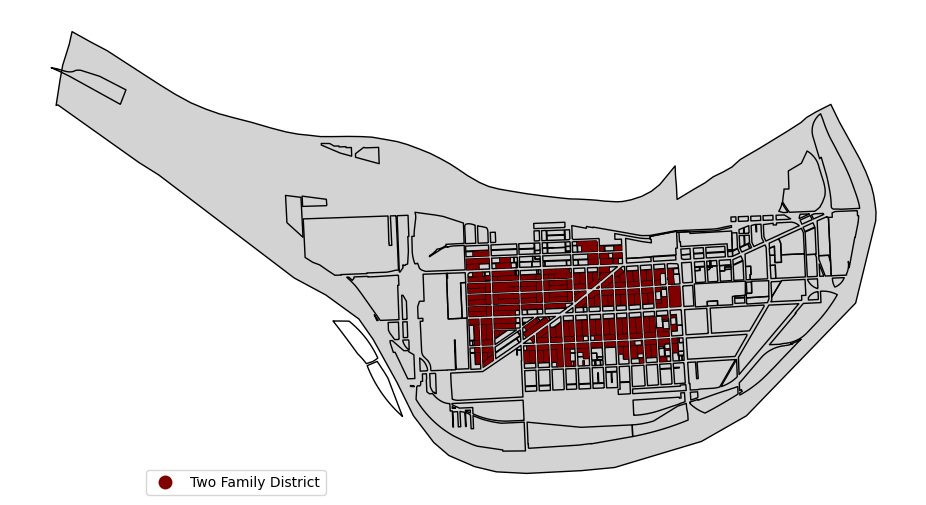

In [26]:
fig, ax = plt.subplots(figsize=(10,6))
kc_zones.plot(ax=ax, ec='k', fc='None')
kc_zones[kc_zones['ZONENAME'].isin(['Single Family District','Two Family District'])].plot(ax=ax, column='ZONENAME',categorical=True, legend=True, 
              legend_kwds=dict(ncols=4, loc=(0.15,-0.)), cmap='jet_r')
armourdale.dissolve("CITY").plot(ax=ax, fc='lightgray', ec='k', zorder=-1)
# ax.minorticks_on()
# ax.grid(color='k')
plt.tight_layout()
ax.set_axis_off()

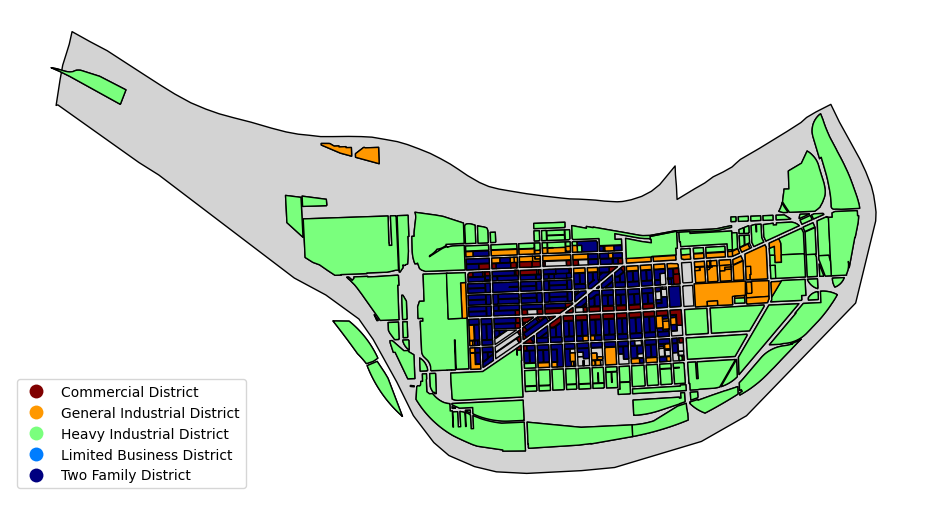

In [41]:
fig, ax = plt.subplots(figsize=(10,6))
kc_zones.plot(ax=ax, ec='k', fc='None')
kc_zones[~kc_zones['ZONENAME'].str.contains('Planned')].plot(ax=ax, 
                                                             column='ZONENAME',
                                                             categorical=True, 
                                                             ec='k',
                                                             legend=True, 
                                                             legend_kwds=dict(ncols=1, 
                                                                              loc='lower left'), 
                                                             cmap='jet_r')
armourdale.dissolve("CITY").plot(ax=ax, fc='lightgray', ec='k', zorder=-1)
# ax.minorticks_on()
# ax.grid(color='k')
plt.tight_layout()
ax.set_axis_off()